In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.patches import Patch
import os
import seaborn as sns
import brewer2mpl
from collections import namedtuple, defaultdict
DataPoint = namedtuple("DataPoint", "min,mean,median,max,sd")

mpl.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.family'] = 'DeJavu Serif'
# plt.rcParams['font.serif'] = ['Times New Roman']
bmap = brewer2mpl.get_map('Set2', 'qualitative', 8)

/opt/homebrew/Caskroom/miniforge/base/envs/dsched_plots/lib/python3.10/site-packages/brewer2mpl/brewer2mpl.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_string


In [85]:
!pip install scanpy

In [8]:
!pwd

/data/sukritk/scheduling/erdos-scheduling-simulator/results/spark_3workloads_arrival_rate_new


In [79]:
goodput = {
    "Spark-FIFO": {
        51: [99.9],
        55: [99.9],
        58: [99],
        60: [97],
        80: [87],
        86: [86],
        92: [82],
       100: [76],
       109: [75],
       120: [62],
       133: [34],
       144: [16],
    },
    "Spark-DSched": {
        51: [99.9],
        55: [99.9],
        58: [99.9],
        60: [99.9],
        80: [99],
        86: [97],
        92: [95],
       100: [94],
       109: [92],
       120: [91],
       133: [88],
       144: [84],
    }
}

In [80]:
datapoints = {}
for scheduler, arrival_rates in goodput.items():
    datapoints[scheduler] = {}
    for arrival_rate, attainment in arrival_rates.items():
        # attainments = np.array(attainment) / 10
        attainments = np.array(attainment)
        datapoints[scheduler][arrival_rate] = DataPoint(
            min=np.min(attainments),
            median=np.median(attainments),
            max=np.max(attainments),
            mean=np.mean(attainments),
            # sd=np.std(attainments, ddof=1),
            sd=0.0,
        )

for scheduler, arrival_rates in datapoints.items():
    print(f"Scheduler: {scheduler}")
    for arrival_rate, datapoint in arrival_rates.items():
        print(f"Rate: {arrival_rate}, Data: {datapoint}")

Scheduler: Spark-FIFO
Rate: 51, Data: DataPoint(min=99.9, mean=99.9, median=99.9, max=99.9, sd=0.0)
Rate: 55, Data: DataPoint(min=99.9, mean=99.9, median=99.9, max=99.9, sd=0.0)
Rate: 58, Data: DataPoint(min=99, mean=99.0, median=99.0, max=99, sd=0.0)
Rate: 60, Data: DataPoint(min=97, mean=97.0, median=97.0, max=97, sd=0.0)
Rate: 80, Data: DataPoint(min=87, mean=87.0, median=87.0, max=87, sd=0.0)
Rate: 86, Data: DataPoint(min=86, mean=86.0, median=86.0, max=86, sd=0.0)
Rate: 92, Data: DataPoint(min=82, mean=82.0, median=82.0, max=82, sd=0.0)
Rate: 100, Data: DataPoint(min=76, mean=76.0, median=76.0, max=76, sd=0.0)
Rate: 109, Data: DataPoint(min=75, mean=75.0, median=75.0, max=75, sd=0.0)
Rate: 120, Data: DataPoint(min=62, mean=62.0, median=62.0, max=62, sd=0.0)
Rate: 133, Data: DataPoint(min=34, mean=34.0, median=34.0, max=34, sd=0.0)
Rate: 144, Data: DataPoint(min=16, mean=16.0, median=16.0, max=16, sd=0.0)
Scheduler: Spark-DSched
Rate: 51, Data: DataPoint(min=99.9, mean=99.9, median

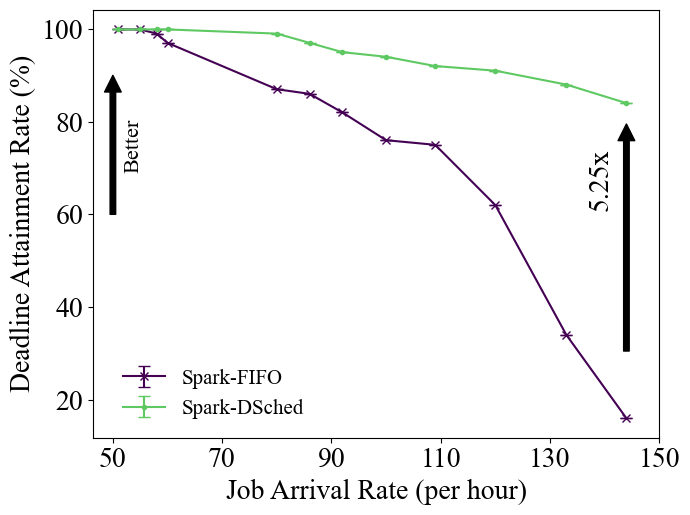

In [81]:
plt.figure(figsize=(7,5.25))
bmap_len = 7
# fifo = bmap.mpl_colors[bmap_len-0]
# edf = bmap.mpl_colors[bmap_len-2]
# graphene = bmap.mpl_colors[bmap_len-4]
# tetrisched = bmap.mpl_colors[bmap_len-5]
# dagsched = bmap.mpl_colors[bmap_len-6]

viridis = mpl.colormaps.get_cmap('viridis')
colors = viridis(np.linspace(0, 1, 5))
fifo, edf, graphene, dagsched, tetrisched = colors
x_vals = list(sorted(datapoints["Spark-DSched"].keys()))
plt.errorbar(x_vals, 
             [datapoints["Spark-FIFO"][x].mean for x in x_vals], 
             yerr=[datapoints["Spark-FIFO"][x].sd  for x in x_vals], 
             marker='x', label="Spark-FIFO", color=fifo, capsize=4)
# plt.errorbar(x_vals, 
#              [datapoints["EDF"][x].mean for x in x_vals], 
#              yerr=[datapoints["EDF"][x].sd  for x in x_vals], 
#              marker='o', label="EDF", color=edf, capsize=4)
# plt.errorbar(x_vals, 
#              [datapoints["Graphene"][x].mean for x in x_vals], 
#              yerr=[datapoints["Graphene"][x].sd  for x in x_vals], 
#              marker='v', label="Graphene", color=graphene, capsize=4)
# plt.errorbar(x_vals,
#              [datapoints["TetriSched"][x].mean for x in x_vals], 
#              yerr=[datapoints["TetriSched"][x].sd  for x in x_vals], 
#              marker='s', label="TetriSched", color=tetrisched, capsize=4)
# plt.axvline(x=80, color=tetrisched, linestyle=':', linewidth=2)
# plt.plot([80, 80], [30, 100], color="orange", linestyle=':', linewidth=2)
plt.errorbar(x_vals, 
             [datapoints["Spark-DSched"][x].mean for x in x_vals], 
             yerr=[datapoints["Spark-DSched"][x].sd  for x in x_vals], 
             marker='.', label="Spark-DSched", color=dagsched, capsize=4)
# plt.axvline(x=115, color=dagsched, linestyle=':', linewidth=2)
# plt.plot([115, 115], [0, 100], color=dagsched, linestyle=':', linewidth=2)
plt.xticks(list(np.arange(50, 160, 20)))
# plt.ylim((30, 105))
# plt.annotate('', xy=(114.5, 50), xytext=(81, 50),
#              arrowprops=dict(facecolor='black', shrink=0.01))
# plt.text(89, 52, "43.75%", color='black', fontsize=20)
# plt.yticks(ticks=list(x for x in np.arange(30, 110, 10)), labels=list(f"{x}" for x in np.arange(30, 110, 10)))
plt.xlabel("Job Arrival Rate (per hour)", fontsize=20)
plt.ylabel("Deadline Attainment Rate (%)", fontsize=20)
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc="lower left", fontsize=15, ncol=1, columnspacing=1, frameon=False, bbox_to_anchor=(0.02, 0))
plt.tight_layout()
# plt.legend()
plt.annotate('', xy=(144, 80), xytext=(144, 30),
             arrowprops=dict(facecolor='black', shrink=0.01))
plt.text(137, 62, "5.25x", color='black', fontsize=20, rotation="vertical")

plt.annotate('', xy=(50, (90)), xytext=(50, (60)),
             arrowprops=dict(facecolor='black', shrink=0.0001))
plt.text(52, 70, "Better", color='black', fontsize=16, rotation="vertical")
plt.savefig("spark_ddl_attainment_vs_arrival_rate.pdf", dpi=300, pad_inches=0)

## Save TPCH Google sheet data to disk as CSV

In [9]:
import csv

def save_tsv_to_csv(tsv_string: str, filename: str):
    """
    Convert a tab-separated string to a CSV file.

    Parameters:
    - tsv_string: str — the TSV-formatted input data.
    - filename: str — the name (or path) of the CSV file to save.
    """
    lines = tsv_string.strip().split("\n")
    headers = lines[0].split("\t")
    rows = [line.split("\t") for line in lines[1:]]

    # Convert each cell to float where possible
    processed_rows = []
    for row in rows:
        processed_rows.append([float(cell) for cell in row])

    # Write to CSV
    with open(filename, mode="w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(headers)
        writer.writerows(processed_rows)

    print(f"Data saved to {filename}")

In [14]:
import pandas as pd
from io import StringIO

def save_tab_separated_string_as_csv(data_string: str, csv_filename: str):
    # Load the tab-separated data string into a pandas DataFrame
    df = pd.read_csv(StringIO(data_string), sep="\t")
    
    # Save the DataFrame to a CSV file
    df.to_csv(csv_filename, index=False)

In [150]:
# Easy-heavy workload data and saving to csv

## NOTE: It has DSched_2 and DSched_1 where {1,2} represent the no-reconsideration-gap.
## Use DSched_2 to be consistent with the simulator and spark experiments.

easy_workload_results = """Jobs per hour	DSched_2	DSched_1	EDF	Tetrisched	Graphene	FIFO
79.2	100.0	100.0	100.0	100.0	100.0	100.0
82.8	100.0	100.0	99.5	100.0	100.0	100.0
86.4	100.0	100.0	99.5	100.0	100.0	100.0
90	100.0	100.0	99.5	100.0	100.0	100.0
93.6	100.0	100.0	99.5	100.0	100.0	100.0
97.2	100.0	100.0	99.5	100.0	100.0	99.5
100.8	100.0	100.0	99.0	100.0	100.0	99.5
104.4	100.0	100.0	99.0	100.0	100.0	98.5
108	100.0	100.0	99.0	100.0	99.5	98.5
111.6	100.0	100.0	99.0	100.0	99.5	98.0
115.2	100.0	100.0	98.5	99.5	99.5	98.0
118.8	100.0	100.0	98.5	99.5	99.5	98.0
122.4	100.0	99.5	98.5	99.5	99.0	97.5
126	100.0	99.5	98.5	99.5	99.0	97.5
129.6	100.0	100.0	98.5	99.0	98.5	97.5
133.2	100.0	99.5	98.0	98.5	98.5	97.0
136.8	99.0	99.5	94.5	98.0	98.0	96.0
140.4	99.5	98.0	94.0	96.5	97.5	96.0
144	98.5	98.5	94.0	96.0	97.5	96.0
147.6	97.5	98.0	94.0	95.5	95.5	91.0
151.2	97.5	97.5	93.5	93.0	95.0	90.5
154.8	96.0	97.0	90.0	91.5	89.5	83.5
158.4	96.0	95.0	88.5	91.0	88.5	83.5
162	96.0	95.0	86.5	90.0	88.0	83.5
165.6	93.0	94.0	79.5	83.0	76.5	67.5
169.2	91.5	93.0	78.5	78.5	74.5	65.5
172.8	90.5	92.0	75.0	77.0	66.5	59.0
176.4	89.5	90.5	70.0	74.5	69.0	55.0
180	88.5	90.5	68.0	72.0	60.0	52.0
183.6	88.0	89.0	61.0	63.0	38.5	29.0
187.2	84.5	85.0	59.5	60.0	36.0	22.5
190.8	84.0	85.5	47.0	50.0	20.0	7.5
194.4	83.0	83.5	44.5	48.5	16.0	7.0
198	82.5	82.0	44.0	46.0	11.0	7.0"""

save_tab_separated_string_as_csv(
    data_string=easy_workload_results,
    csv_filename="spark_tpch_sim_E_workload.csv"
)

In [151]:
# Easy-medium-hard mix workload and saving to csv

emh_workload_results = """Jobs per hour	DSched_2	EDF	FIFO	Graphene	Tetrisched
36	100.0	99.5	99.5	99.5	100.0
39.6	100.0	99.5	99.5	99.5	100.0
43.2	100.0	99.5	99.0	99.5	100.0
46.8	100.0	99.5	99.0	99.5	99.5
50.4	99.5	99.5	99.0	99.5	99.5
54	99.5	99.0	99.0	99.5	99.5
57.6	99.5	99.0	99.0	98.6	98.6
61.2	99.5	99.0	98.5	98.6	98.6
64.8	99.5	98.0	98.5	98.2	97.7
68.4	99.5	98.0	97.5	98.2	97.7
72	99.0	97.5	97.0	98.2	97.1
75.6	99.0	97.5	97.5	97.7	96.8
79.2	99.0	97.5	96.0	96.4	96.4
82.8	99.0	96.5	95.5	95.9	96.1
86.4	99.0	96.0	94.5	95.0	95.5
90	98.5	95.5	94.0	95.0	94.7
93.6	98.0	94.5	92.5	92.9	92.3
97.2	98.5	94.0	92.5	92.4	92.0
100.8	97.5	94.0	88.5	91.4	90.9
104.4	97.5	93.0	88.5	90.8	90.5
108	97.0	93.0	88.5	88.5	89.5
111.6	97.0	92.0	88.0	87.7	88.6
115.2	97.0	91.5	85.0	82.3	87.3
118.8	95.0	91.5	83.0	82.3	83.2
122.4	94.5	85.5	77.0	79.1	83.2
126	94.5	85.0	74.5	78.2	80.9
129.6	93.5	81.0	71.0	71.7	77.1
133.2	92.5	81.0	70.5	71.0	74.3
136.8	92.0	76.0	67.0	67.8	73.2
140.4	87.5	70.0	51.5	58.6	66.4
144	86.5	67.0	41.5	54.5	58.6
147.6	84.5	61.5	30.0	40.9	51.4
151.2	83.5	56.0	27.0	34.5	50.0
154.8	83.0	55.5	7.0	15.0	48.6
158.4	81.5	47.0	0.5	4.5	34.1
162	79.5	41.0	0.0	4.1	29.1
165.6	77.0	41.0	0.0	4.1	27.3
169.2	76.0	36.0	0.0	4.1	25.9
172.8	74.5	35.0	0.0	4.1	21.8
176.4	73.0	35.0	0.0	2.7	21.4
180	71.0	32.5	0.0	2.3	17.3
183.6	66.5	31.0	0.0	2.3	14.5
187.2	66.0	30.0	0.0	2.3	14.1
190.8	65.5	28.5	0.0	2.0	13.6
194.4	65.0	27.0	0.0	2.0	9.1"""

save_tab_separated_string_as_csv(
    data_string=emh_workload_results,
    csv_filename="spark_tpch_sim_EMH_workload.csv"
)

In [152]:
# Hard heavy workload and saving to csv

hard_workload_results = """Jobs per hour	DSched_2	EDF	Tetrisched	Graphene	FIFO
79.2	100.0	99.0	99.5	99.0	98.5
82.8	99.5	99.0	98.0	98.5	97.0
86.4	99.0	97.5	95.0	96.5	96.5
90.0	98.0	96.0	93.0	92.0	92.5
93.6	97.0	93.5	90.5	87.5	85.5
97.2	95.5	84.0	85.0	79.0	77.5
100.8	94.5	82.0	78.0	75.0	68.5
104.4	92.5	74.0	75.5	64.5	52.0
108.0	90.5	66.5	64.5	51.0	39.5
111.6	88.5	54.5	51.5	26.0	15.0
115.2	84.0	39.5	39.5	6.0	2.0
118.8	82.0	36.5	30.0	4.5	1.5
122.4	80.5	19.5	25.0	4.0	0.0
126.0	77.5	19.0	13.5	2.5	0.0
129.6	74.5	19.0	13.0	2.0	0.0
133.2	74.0	18.0	18.0	1.5	0.0
136.8	72.5	17.0	8.5	1.0	0.0
140.4	71.5	16.0	8.5	0.5	0.0
144.0	68.0	11.0	7.5	0.5	0.0"""

save_tab_separated_string_as_csv(
    data_string=hard_workload_results,
    csv_filename="spark_tpch_sim_H_workload.csv"
)

In [19]:
## Function to populate goodput dict from csv

def populate_goodput_dict(csv_filename: str) -> dict:
    df = pd.read_csv(csv_filename, sep=",")
    
    # Map CSV column names to goodput dictionary keys
    scheduler_key_map = {
        "DSched_2": "DSched",
        "EDF": "EDF",
        "FIFO": "FIFO",
        "Graphene": "Graphene",
        "Tetrisched": "Tetrisched",
    }

    goodput = {v: {} for v in scheduler_key_map.values()}

    for _, row in df.iterrows():
        jobs_per_hour = int(round(row["Jobs per hour"]))
        for csv_col, goodput_key in scheduler_key_map.items():
            goodput[goodput_key][jobs_per_hour] = [row[csv_col]]

    return goodput

In [26]:
def get_miss_rate_datapoints(goodput: dict) -> dict:
    miss_rate_datapoints = {}
    for scheduler, arrival_rates in goodput.items():
        miss_rate_datapoints[scheduler] = {}
        for arrival_rate, attainment in arrival_rates.items():
            attainments = 100 - (np.array(attainment))
            miss_rate_datapoints[scheduler][arrival_rate] = DataPoint(
                min=np.min(attainments),
                median=np.median(attainments),
                max=np.max(attainments),
                mean=np.mean(attainments),
                sd=0.0,
            )
    return miss_rate_datapoints

def print_miss_rate_stats(miss_rate_datapoints: dict) -> None:
    for scheduler, arrival_rates in miss_rate_datapoints.items():
        print(f"Scheduler: {scheduler}")
        for arrival_rate, datapoint in arrival_rates.items():
            print(f"Rate: {arrival_rate}, Data: {datapoint}")

In [40]:
# Setting the colors
viridis = cm.get_cmap('viridis')  # Old-style API
colors = viridis(np.linspace(0, 1, 5))
clr_fifo, clr_edf, clr_graphene, clr_dsched, clr_tetrisched = colors

## Easy-heavy workload

In [153]:
easy_workload_goodput = populate_goodput_dict(
    csv_filename="spark_tpch_sim_E_workload.csv"
)

In [154]:
easy_workload_goodput

{'DSched': {79: [100.0],
  83: [100.0],
  86: [100.0],
  90: [100.0],
  94: [100.0],
  97: [100.0],
  101: [100.0],
  104: [100.0],
  108: [100.0],
  112: [100.0],
  115: [100.0],
  119: [100.0],
  122: [100.0],
  126: [100.0],
  130: [100.0],
  133: [100.0],
  137: [99.0],
  140: [99.5],
  144: [98.5],
  148: [97.5],
  151: [97.5],
  155: [96.0],
  158: [96.0],
  162: [96.0],
  166: [93.0],
  169: [91.5],
  173: [90.5],
  176: [89.5],
  180: [88.5],
  184: [88.0],
  187: [84.5],
  191: [84.0],
  194: [83.0],
  198: [82.5]},
 'EDF': {79: [100.0],
  83: [99.5],
  86: [99.5],
  90: [99.5],
  94: [99.5],
  97: [99.5],
  101: [99.0],
  104: [99.0],
  108: [99.0],
  112: [99.0],
  115: [98.5],
  119: [98.5],
  122: [98.5],
  126: [98.5],
  130: [98.5],
  133: [98.0],
  137: [94.5],
  140: [94.0],
  144: [94.0],
  148: [94.0],
  151: [93.5],
  155: [90.0],
  158: [88.5],
  162: [86.5],
  166: [79.5],
  169: [78.5],
  173: [75.0],
  176: [70.0],
  180: [68.0],
  184: [61.0],
  187: [59.5],
  

In [155]:
easy_miss_rate_datapoints = get_miss_rate_datapoints(easy_workload_goodput)
print_miss_rate_stats(easy_miss_rate_datapoints)

Scheduler: DSched
Rate: 79, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 83, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 86, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 90, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 94, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 97, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 101, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 104, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 108, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 112, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 115, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 119, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 122, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 126, Da

In [156]:
len(easy_miss_rate_datapoints["DSched"])

34

In [163]:
import matplotlib.pyplot as plt
import numpy as np

def plot_miss_rate_vs_arrival_rate(
    miss_rate_datapoints: dict,
    file_name: str,
    better_arrow_xy: tuple = (50, 10),
    better_arrow_text: str = "Better",
    xticks: list = None,
    num_points: int = 16,
    small_value: float = 0.15,
    x_lim_left: int = 80,
    x_lim_right: int = 200
):
    # Define color mapping (update these with your actual colors)
    colors = {
        "FIFO": clr_fifo,
        "EDF": clr_edf,
        "Graphene": clr_graphene,
        "Tetrisched": clr_tetrisched,
        "DSched": clr_dsched,
    }

    markers = {
        "FIFO": 'x',
        "EDF": 'o',
        "Graphene": 'v',
        "Tetrisched": 's',
        "DSched": '.',
    }

    plt.figure(figsize=(7, 3.5))

    x_vals = sorted(miss_rate_datapoints["DSched"].keys())

    if len(x_vals) > num_points:
        step = len(x_vals) / num_points
        x_vals = [x_vals[int(i * step)] for i in range(num_points)]

    x_vals = [x for x in x_vals if x_lim_left <= x <= x_lim_right]

    schedulers = ["FIFO", "EDF", "Graphene", "Tetrisched", "DSched"]
    miss_rates_by_scheduler = {}

    for scheduler in schedulers:
        if scheduler in miss_rate_datapoints:
            y_vals = [max(miss_rate_datapoints[scheduler][x].mean, small_value) for x in x_vals]
            y_errs = [miss_rate_datapoints[scheduler][x].sd for x in x_vals]
            plt.errorbar(x_vals, y_vals, yerr=y_errs,
                         marker=markers[scheduler], label=scheduler,
                         color=colors[scheduler], capsize=4)
            miss_rates_by_scheduler[scheduler] = dict(zip(x_vals, y_vals))

    # Arrow and annotation for "Better"
    arrow_x, arrow_y = better_arrow_xy
    plt.annotate('', xy=(arrow_x, arrow_y), xytext=(arrow_x, 100),
                 arrowprops=dict(facecolor='black', shrink=0.0001))
    plt.text(arrow_x + 3, 100 - 85, better_arrow_text, color='black', fontsize=16, rotation="vertical")

    # Compute DSched % improvement at x closest to x_lim_right
    closest_x = min(x_vals, key=lambda x: abs(x - x_lim_right))
    dsched_rate = miss_rates_by_scheduler["DSched"][closest_x]
    baseline_rates = [
        (s, miss_rates_by_scheduler[s][closest_x])
        for s in schedulers if s != "DSched" and closest_x in miss_rates_by_scheduler[s]
    ]
    baseline_scheduler, baseline_rate = min(baseline_rates, key=lambda x: x[1])

    percent_improvement = 100 * (baseline_rate - dsched_rate) / baseline_rate

    # Annotate with arrow and "% lower" text
    arrow_x = closest_x + 2
    text_x = closest_x + 1
    plt.annotate('', xy=(arrow_x, dsched_rate), xytext=(arrow_x, baseline_rate),
                 arrowprops=dict(facecolor='black', arrowstyle='-|>', lw=1.5))

    midpoint = np.sqrt(dsched_rate * baseline_rate)  # log-space midpoint
    plt.text(text_x, midpoint,
             f"{percent_improvement:.0f}%", fontsize=16,
             verticalalignment='center', horizontalalignment='right', fontweight='bold')

    plt.xlim(x_lim_left, x_lim_right)

    if xticks is None:
        xticks = list(np.arange(x_lim_left, x_lim_right + 1, 20))
    plt.xticks(xticks)

    plt.yscale('log')
    plt.xlabel("Job Arrival Rate (per hour)", fontsize=20)
    plt.ylabel("Miss Rate (%)", fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=20)

    # plt.legend(loc="lower right", fontsize=15, ncol=1, columnspacing=1, frameon=False, bbox_to_anchor=(1, 0))
    plt.tight_layout()
    plt.savefig(file_name, pad_inches=0, dpi=300)
    plt.close()

In [89]:
x_vals = sorted(easy_miss_rate_datapoints["DSched"].keys())
len(x_vals)

34

In [164]:
plot_miss_rate_vs_arrival_rate(
    miss_rate_datapoints=easy_miss_rate_datapoints,
    file_name="spark_sim_easy_workload_slo_miss_arrival_rate_24pts.pdf",
    better_arrow_xy=(85, 10),
    xticks=list(np.arange(80, 201, 20)),
    num_points=24,
    x_lim_left=80,
    x_lim_right=200
)

## Easy-medium-hard workload mix

In [159]:
emh_workload_goodput = populate_goodput_dict(
    csv_filename="spark_tpch_sim_EMH_workload.csv"
)
emh_miss_rate_datapoints = get_miss_rate_datapoints(emh_workload_goodput)
print_miss_rate_stats(emh_miss_rate_datapoints)

Scheduler: DSched
Rate: 36, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 40, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 43, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 47, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 50, Data: DataPoint(min=0.5, mean=0.5, median=0.5, max=0.5, sd=0.0)
Rate: 54, Data: DataPoint(min=0.5, mean=0.5, median=0.5, max=0.5, sd=0.0)
Rate: 58, Data: DataPoint(min=0.5, mean=0.5, median=0.5, max=0.5, sd=0.0)
Rate: 61, Data: DataPoint(min=0.5, mean=0.5, median=0.5, max=0.5, sd=0.0)
Rate: 65, Data: DataPoint(min=0.5, mean=0.5, median=0.5, max=0.5, sd=0.0)
Rate: 68, Data: DataPoint(min=0.5, mean=0.5, median=0.5, max=0.5, sd=0.0)
Rate: 72, Data: DataPoint(min=1.0, mean=1.0, median=1.0, max=1.0, sd=0.0)
Rate: 76, Data: DataPoint(min=1.0, mean=1.0, median=1.0, max=1.0, sd=0.0)
Rate: 79, Data: DataPoint(min=1.0, mean=1.0, median=1.0, max=1.0, sd=0.0)
Rate: 83, Data: Data

In [165]:
plot_miss_rate_vs_arrival_rate(
    miss_rate_datapoints=emh_miss_rate_datapoints,
    file_name="spark_sim_emh_mix_workload_slo_miss_arrival_rate_24pts.pdf",
    better_arrow_xy=(85, 10),
    xticks=list(np.arange(80, 201, 20)),
    num_points=24,
    x_lim_left=80,
    x_lim_right=200
)

## Hard heavy workload

In [161]:
h_workload_goodput = populate_goodput_dict(
    csv_filename="spark_tpch_sim_H_workload.csv"
)
h_miss_rate_datapoints = get_miss_rate_datapoints(h_workload_goodput)
print_miss_rate_stats(h_miss_rate_datapoints)

Scheduler: DSched
Rate: 79, Data: DataPoint(min=0.0, mean=0.0, median=0.0, max=0.0, sd=0.0)
Rate: 83, Data: DataPoint(min=0.5, mean=0.5, median=0.5, max=0.5, sd=0.0)
Rate: 86, Data: DataPoint(min=1.0, mean=1.0, median=1.0, max=1.0, sd=0.0)
Rate: 90, Data: DataPoint(min=2.0, mean=2.0, median=2.0, max=2.0, sd=0.0)
Rate: 94, Data: DataPoint(min=3.0, mean=3.0, median=3.0, max=3.0, sd=0.0)
Rate: 97, Data: DataPoint(min=4.5, mean=4.5, median=4.5, max=4.5, sd=0.0)
Rate: 101, Data: DataPoint(min=5.5, mean=5.5, median=5.5, max=5.5, sd=0.0)
Rate: 104, Data: DataPoint(min=7.5, mean=7.5, median=7.5, max=7.5, sd=0.0)
Rate: 108, Data: DataPoint(min=9.5, mean=9.5, median=9.5, max=9.5, sd=0.0)
Rate: 112, Data: DataPoint(min=11.5, mean=11.5, median=11.5, max=11.5, sd=0.0)
Rate: 115, Data: DataPoint(min=16.0, mean=16.0, median=16.0, max=16.0, sd=0.0)
Rate: 119, Data: DataPoint(min=18.0, mean=18.0, median=18.0, max=18.0, sd=0.0)
Rate: 122, Data: DataPoint(min=19.5, mean=19.5, median=19.5, max=19.5, sd=0.

In [166]:
plot_miss_rate_vs_arrival_rate(
    miss_rate_datapoints=h_miss_rate_datapoints,
    file_name="spark_sim_hard_workload_slo_miss_arrival_rate_24pts.pdf",
    better_arrow_xy=(82, 10),
    xticks=list(np.arange(80, 151, 20)),
    num_points=24,
    x_lim_left=80,
    x_lim_right=148
)

In [148]:
len(h_miss_rate_datapoints["DSched"])

19

## Combined plot for spark simulation expts

In [200]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

def plot_combined_miss_rate_vs_arrival_rate(
    miss_rate_sets: list,     # List of miss_rate_datapoints dictionaries
    file_name: str,           # Output file name
    better_arrow_xys: list,   # List of (x, y) for "Better" arrow per subplot
    xticks_list: list,        # List of xticks for each subplot
    num_points: int = 24,
    x_lims: list = [(80, 200), (80, 200), (80, 148)],  # x-axis limits per subplot
):
    colors = {
        "FIFO": clr_fifo,
        "EDF": clr_edf,
        "Graphene": clr_graphene,
        "Tetrisched": clr_tetrisched,
        "DSched": clr_dsched,
    }

    markers = {
        "FIFO": 'x',
        "EDF": 'o',
        "Graphene": 'v',
        "Tetrisched": 's',
        "DSched": '.',
    }

    schedulers = ["FIFO", "EDF", "Graphene", "Tetrisched", "DSched"]
    fig, axs = plt.subplots(1, 3, figsize=(15, 3.5), sharey=False)

    for ax, miss_rate_datapoints, arrow_xy, xticks, (x_lim_left, x_lim_right) in zip(
        axs, miss_rate_sets, better_arrow_xys, xticks_list, x_lims
    ):
        x_vals = sorted(miss_rate_datapoints["DSched"].keys())
        if len(x_vals) > num_points:
            step = len(x_vals) / num_points
            x_vals = [x_vals[int(i * step)] for i in range(num_points)]

        x_vals = [x for x in x_vals if x_lim_left <= x <= x_lim_right]
        miss_rates_by_scheduler = {}

        for scheduler in schedulers:
            if scheduler in miss_rate_datapoints:
                y_vals = [max(miss_rate_datapoints[scheduler][x].mean, 0.15) for x in x_vals]
                y_errs = [miss_rate_datapoints[scheduler][x].sd for x in x_vals]
                ax.errorbar(x_vals, y_vals, yerr=y_errs,
                            marker=markers[scheduler], label=scheduler,
                            color=colors[scheduler], capsize=4)
                miss_rates_by_scheduler[scheduler] = dict(zip(x_vals, y_vals))

        # Arrow and annotation for "Better"
        arrow_x, arrow_y = arrow_xy
        ax.annotate('', xy=(arrow_x, arrow_y), xytext=(arrow_x, 100),
                    arrowprops=dict(facecolor='black', shrink=0.0001))
        ax.text(arrow_x + 3, 15, "Better", color='black', fontsize=14, rotation="vertical")

        # DSched improvement annotation
        closest_x = min(x_vals, key=lambda x: abs(x - x_lim_right))
        dsched_rate = miss_rates_by_scheduler["DSched"][closest_x]
        baseline_rates = [
            (s, miss_rates_by_scheduler[s][closest_x])
            for s in schedulers if s != "DSched" and closest_x in miss_rates_by_scheduler[s]
        ]
        baseline_scheduler, baseline_rate = min(baseline_rates, key=lambda x: x[1])
        percent_improvement = 100 * (baseline_rate - dsched_rate) / baseline_rate
        arrow_x = closest_x + 2
        text_x = closest_x + 1
        ax.annotate('', xy=(arrow_x, dsched_rate), xytext=(arrow_x, baseline_rate),
                    arrowprops=dict(facecolor='black', arrowstyle='-|>', lw=1.5))
        midpoint = np.sqrt(dsched_rate * baseline_rate)
        ax.text(text_x, midpoint, f"{percent_improvement:.0f}%", fontsize=15,
                verticalalignment='center', horizontalalignment='right', fontweight='bold')

        ax.set_xlim(x_lim_left, x_lim_right)
        ax.set_xticks(xticks)
        ax.set_yscale('log')
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.set_xlabel("Job Arrival Rate (per hour)", fontsize=15)

    axs[0].set_ylabel("Miss Rate (%)", fontsize=15)

    # Custom legend using rectangles
    legend_elements = [
        Patch(facecolor=colors[sched], edgecolor='none', label=sched)
        for sched in schedulers
    ]
    fig.legend(handles=legend_elements, loc='upper center', ncol=len(schedulers), fontsize=18, frameon=False)

    plt.tight_layout(rect=[0, 0, 1, 0.89])  # leave space at top for legend
    plt.savefig(file_name, dpi=300, bbox_inches='tight', pad_inches=0.05)
    plt.close()

In [201]:
plot_combined_miss_rate_vs_arrival_rate(
    miss_rate_sets=[easy_miss_rate_datapoints, emh_miss_rate_datapoints, h_miss_rate_datapoints],
    file_name="combined_miss_rate_vs_arrival_rate.pdf",
    better_arrow_xys=[(85, 10), (85, 10), (82, 10)],
    xticks_list=[
        list(np.arange(80, 201, 20)),
        list(np.arange(80, 201, 20)),
        list(np.arange(80, 151, 20)),
    ],
    num_points=24,
    x_lims=[(80, 200), (80, 200), (80, 148)],
)

In [83]:
# miss_rate_datapoints["TetriSched"][175].mean / miss_rate_datapoints["DAGSched"][175].mean 

In [84]:
# miss_rate_datapoints["TetriSched"][175].mean

In [85]:
# miss_rate_datapoints["DAGSched"][175].mean 

In [86]:
# print(miss_rate_datapoints["DAGSched"][115].mean )
# print(miss_rate_datapoints["TetriSched"][80].mean )

In [87]:
# tetrisched

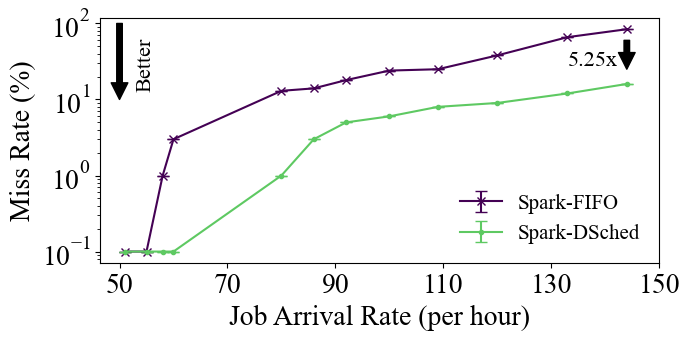

In [96]:
plt.figure(figsize=(7,3.5))
x_vals = list(sorted(miss_rate_datapoints["Spark-DSched"].keys()))
plt.errorbar(x_vals, 
             [miss_rate_datapoints["Spark-FIFO"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["Spark-FIFO"][x].sd  for x in x_vals], 
             marker='x', label="Spark-FIFO", color=fifo, capsize=4)
# plt.errorbar(x_vals, 
#              [miss_rate_datapoints["EDF"][x].mean for x in x_vals], 
#              yerr=[miss_rate_datapoints["EDF"][x].sd  for x in x_vals], 
#              marker='o', label="EDF", color=edf, capsize=4)
# plt.errorbar(x_vals, 
#              [miss_rate_datapoints["Graphene"][x].mean for x in x_vals], 
#              yerr=[miss_rate_datapoints["Graphene"][x].sd  for x in x_vals], 
#              marker='v', label="Graphene", color=graphene, capsize=4)
# plt.errorbar(x_vals,
#              [miss_rate_datapoints["TetriSched"][x].mean for x in x_vals], 
#              yerr=[miss_rate_datapoints["TetriSched"][x].sd  for x in x_vals], 
#              marker='s', label="TetriSched", color=tetrisched, capsize=4)


# plt.plot([80, 80], [30, 100], color="orange", linestyle=':', linewidth=2)
plt.errorbar(x_vals, 
             [miss_rate_datapoints["Spark-DSched"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["Spark-DSched"][x].sd  for x in x_vals], 
             marker='.', label="Spark-DSched", color=dagsched, capsize=4)

plt.xticks(list(np.arange(50, 160, 20)))
# plt.xticks(list(np.arange(80, 203, 20)))

plt.yscale('log')

plt.xlabel("Job Arrival Rate (per hour)", fontsize=20)
plt.ylabel("Miss Rate (%)", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.legend(loc="lower right", fontsize=15, ncol=1, columnspacing=1, frameon=False, bbox_to_anchor=(1, 0))

#Annotations 
plt.annotate('', xy=(144, (100-75)), xytext=(144, (100-40)),
             arrowprops=dict(facecolor='black', shrink=0.0001))
plt.text(133, (100-72), "5.25x", color='black', fontsize=16, rotation="horizontal")

plt.annotate('', xy=(50, (10)), xytext=(50, (100)),
             arrowprops=dict(facecolor='black', shrink=0.0001))
plt.text(53, (100-85), "Better", color='black', fontsize=16, rotation="vertical")

# plt.annotate('', xy=(114.5, 100-50), xytext=(81, 100-50),
#              arrowprops=dict(facecolor='black', shrink=0.01))
# plt.text(89, 100-45, "43.75%", color='black', fontsize=20)
# plt.axvline(x=80, color=tetrisched, linestyle=':', linewidth=2)
# plt.axvline(x=115, color=dagsched, linestyle=':', linewidth=2)

# plt.annotate('', xy=(175, 75), xytext=(175, 60),
#              arrowprops=dict(facecolor='black', shrink=0.01))
# plt.text(168, 62, "1.41x", color='black', fontsize=20, rotation="vertical")
plt.savefig("spark_miss_rate_vs_arrival_rate.pdf", pad_inches=0, dpi=300)

In [3]:
def to_ms(k):
    return [x / 1000 for x in k]
def to_s(k):
    return [x / 1e6 for x in k]

In [4]:
spark_sched = {
    "TPC-H": to_s(
        [2918,24842,1727,21593,18833,4677,1781,2656,2252,21180,39002,24908,3864,23869,23041,40618,44353,64108,115715,106233,184735,11771,96687,90572,27405,79457,74491,65287,39150,120715,63468,92017,72058,110822,213545,38425,152461,45174,66524,25465,46808,10136,160947,147818,174777,276702,2134502,182192,292802,2119757,1357621,398807,141113,1638050,193096,112701,121326,3159,13085,25736,3730,25324,2337,42805,6048,24151,51502,1366,24227,22843,14276,47477,5362,7578,7204,23936,73355,59368,49798,62027,139329,133340,25513,148021,84357,82095,32040,127630,161053,212925,214621,322932,765056,311246,188223,94080,66537,37854,62715,57630]
    ),
    "Alibaba": to_s(
    [17502,13979,38720,11792,12920,69178,113763,33983,21607,146193,27597,21595,30448,17909,25312,17843,17340,7164,13834,43167,8487,25289,122387,311316,50176,34574,24787,12297,25857,17419,76731,79298,10445,27610,90798,23699,309443,10346,27193,33957,78249,73845,30744,46096,114375,405363,35392,66213,152721,214004,778900,454161,55928,417900,41389,113072,126800,177994,28196,411633,13250,1029532,35360,54712,391679,91499,766635,650782,1237996,1086762,146059,294153,168148,617467,474520,513893,286052,1693118,3752455,546455,938405,9102164,869957,593520,410725,1248732,1577707,838082,32265,214689,102666,743182,2185412,89511,143655,181875,571981,71360,16649,567567,193999,128680,63472,92622,24210,45631,573411,440913,71486,425308,514139,589109,401842,1066991,1288450,580353,379150,202423,99341,991232,180283,402475,365479,1509807,219107,51765,1159190,470307,92697,348839,1201931,152183,919067,484296,316088,269893,451010,77267,767614,234065,179452,92162,960049,172753,701866,124133,85663,239741,50352,311358,58529,147084,427680,425119,327016,88162,16963,61505,329124,39568,146376,256549,40489,274800,70916,30898,36510,135443,35971,300250,71551,466218,143204,70725,109217,157012,64057,36174,97587,16465649,9104345,1646181,1076227,1454002,57232,281042,83327,38607,766331,370591,154625,136514,98136,378876,518385,656561,45116,313163,399270,341237,143629,213436,292894,516005,303022,259075,200647,58209,1053182,203504,529070,381439,578759,277464,731351,327250,918906,369145,1035051,227651,449163,876198,408326,132082,282560,298964,501084,647961,1973812,1772600,734957,259170,1413450,619089,203991,893679,867479,576887,325381,175773,577836,301632,152834,312604,476197,176471,282424,1016794,352622,797814,2150991,819456,1478623,1164158,825253,1493613,416430,896158,1636281,1366147,386098,1409897,1347722,835697,1811298,119725,370290,169617,573965,444655,547726,315710,155328,64359,202937,330364,123242,537374,212370,1697725,453084,674497,191149,330108,323862,59019,568757,208990,146183,886901,157196,883546,105560,178551,550478,198973,1579981,1470917,589821,302584,387998,1120241,352172,50789,27310,238799,148258,112034,71828,183933,51753,820787,98969,650376,1011121,83163,549823,75816,60390,65909,33562,1542000,420739,285819,760471,649088,396057,1162177,659720,199891,339733,2021402,278753,345786,1404834,247192,165010,470328,243980,683032,1383554,646497,245177,637104,144708,315210,436623,898909,114113,241991,39184,228797,183532,420582,175686,312463,172678,288317,131456,321605,41921,154559,357457,177811,43703,417362,128810,442676,249007,1694915,263926,119776,418280,140714,246294,362877,135343,241340,325022,401719,243066,56592,1032381,666446,680292,535859,378914,219810,218442,383751,1163719,107358,98659,126430,352158,1250392,183136,314643,1326893,641638,65501,26973,396059,86755,52395,356903,114212,139286,35073,39391,167006,90604,218177,130841,262619,93336,39474,229446,65556,124813,225212,57737,31313,57431,20909,137126,245018,11317,187852,74633,188502,61092,32258,412498,462821,44828,70202,576069,1086407,114616,411635,16919,112094,48783,320214,284534,76894,47642,84097,143144,289488,181263,40121,104208,31052,62615,23383,186273,21907,43005,29688,48439,41254,67642,911235,115685,1068789,307708,334613,952678,89433,467333,420646,776651,588218,62165,217775,262349,238606,615815,280489,292638,101252,303466,151031,6068294,252007,599561,473222,1425359,897015,449729,265517,783477,105497,12450361,6888256,1088594,938940,1670704,106904,406442,280919,258781,3312250,1091781,600244,304602,1164300,419227,2105163,1175237,2141033,1276249,3134780,984703,874742,479462,108347,127817,631293,137894,107499,129398,26970,328847,105765,927298,167239,118627,113269,126163,20593,55743,14411,151744,30246,27200,120142,12359,352362,93151,62503,260250,37823,691402,1228057,172863,436009,1487260,635708,458702,1121762,2854436,4756677,1504752,411648,277955,147505,41004,201439,749160,128093,342117,339570,112294,214873,29815,173917,31432,41514,76120,469511,112035,285340,132444,295390,807858,969066,68733,305850,165599,339670,143271,95403,932497,1922866,739387,140939,736592,120767,529364,1706891,2380147,1286027,796834,31457,573909,27825,961941,281346,31488,68701,314836,333160,687591,87010,113750,29105,35416,82012,81777,60484,53994,35117,84312,24091,139386,99487,139729,94682,18914,48170,78015,66952,93377,294913,174784,60339,521459,70873,209466,270498,128190,449955,1841758,688268,1120997,660450,1571880,201719,870642,154997,739409,57976,68646,709081,449486,333785,119059,111916,1485569,159183,124065,460887,29817,36376,475916,549505,103879,47153,160958,905122,157646,141334,702286,133892,106508,20398,39310,170073,35980,34234,279641,40756,707638,216497,89553,27723,127893,210276,102965,138538,132228,123817,340319,33470,74514,63927,554291,93458,18338,107442,6742648,59471,692438,523518,630628,801646,667348,226726,786708,2781620,1175309,1409655,118315,1005846,178459,581847,1161487,10295,288493,66786,19323,413712,96177,49257,29416,91185,52400,289059,140444,452311,29358,65159,543525,158638,288099,370523,452458,132443,90045,823076,173640,483500,3607872,264012,1520135,916533,340153,892139,1524861,1146821,747907,1242019,1008596,683374,386593,93601,98315,91000,373448,454045,479793,49592,151808,849481,41412,80086,118682,59065,87304,248400,87869,131502,95722,304949,342242,48382,33452,176064,107445,421890,90439,151055,68202,202488,76670,349295,100652,296550,388332,521630,118658,22840,260988,309336,511373,419737,53773,180756,857510,398333,1987853,160048,1328387,96759,78191,345193,129456,554027,278237,46566,91764,1163611,60816,368182,419738,71815,158558,339492,147523,456631,128947,77459,998905,91753,186839,228071,187466,194490,454581,372621,1924432,1274018,1491876,1701031,600750,626180,4422966,1052281,196908,2785839,1590328,3207999,5590497,673733,466902,531764,806037,785907,116592,871909,172142,498458,1194440,191842,136081,291712,33983,585919,507781,538220,305595,165401,191935,113588,148285,200943,956088,132771,84211,389828,91599,197418,106100,438783,158630,131027,635314,1240615,663711,315755,1317177,413842,1053324,533409,138297,204015,154190,2030032,190730,452731,4139047,1198488,2228817,1442625,1261558,628046,580712,532731,1338974,77510,3531637,489904,434636,111048,754367,573532,627017,3213638,737417,439241,83283,36474,231914,509102,37341,27609,93541,34452,549144,1344762,134042,90889,177228,245124,47171,198279,69328,556003,475088,67217,355858,363607,23910,280671,456426,82665,203957,1722065,315488,363695,891092,244954,932791,279551,120810,357229,731562,52413,522985,100295,662739,184388,1174283,270651,942789,707954,1035186,1232306,890765,1425912,2592330,1403626,3561168,1205662,767842,1839975,178591,395722,529452,664199,219487,310692,75827,807845,488151,615668,551144,242702,963148,338161,843056,301528,696732,696654,1159109,388036,272086,57697,147086,13729,11942,18248,18140,24978,174960,8176]
    )
}

/var/folders/z1/q89jsfxs34j3n_fjgzp3bm780000gn/T/ipykernel_73964/1103444043.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


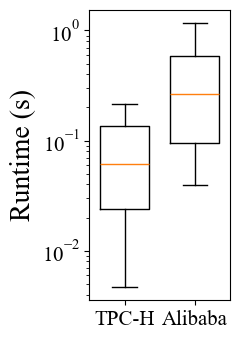

In [15]:
## Reduced whitespace plot

plt.figure(figsize=(2.5, 3.5))  # narrower width

plt.boxplot(
    [v for k, v in spark_sched.items()],
    labels=[k for k, v in spark_sched.items()],
    whis=(10, 90),
    showfliers=False,
    widths=0.7,  # fatter boxes
)

plt.yscale("log")
plt.ylabel("Runtime (s)", fontsize=20)
plt.tick_params(axis="both", which="major", labelsize=15)

plt.margins(x=0.2)  # minimal whitespace around boxes
plt.tight_layout()

plt.savefig(
    "dsched_runtime_spark_alibaba.pdf", dpi=300, bbox_inches="tight", pad_inches=0.02
)

In [121]:
spark_sched = {
    "TPC-H": to_s(
        [2918,24842,1727,21593,18833,4677,1781,2656,2252,21180,39002,24908,3864,23869,23041,40618,44353,64108,115715,106233,184735,11771,96687,90572,27405,79457,74491,65287,39150,120715,63468,92017,72058,110822,213545,38425,152461,45174,66524,25465,46808,10136,160947,147818,174777,276702,2134502,182192,292802,2119757,1357621,398807,141113,1638050,193096,112701,121326,3159,13085,25736,3730,25324,2337,42805,6048,24151,51502,1366,24227,22843,14276,47477,5362,7578,7204,23936,73355,59368,49798,62027,139329,133340,25513,148021,84357,82095,32040,127630,161053,212925,214621,322932,765056,311246,188223,94080,66537,37854,62715,57630]
    )
}

In [151]:
np.percentile(spark_sched["TPC-H"], 90)

0.22082910000000053

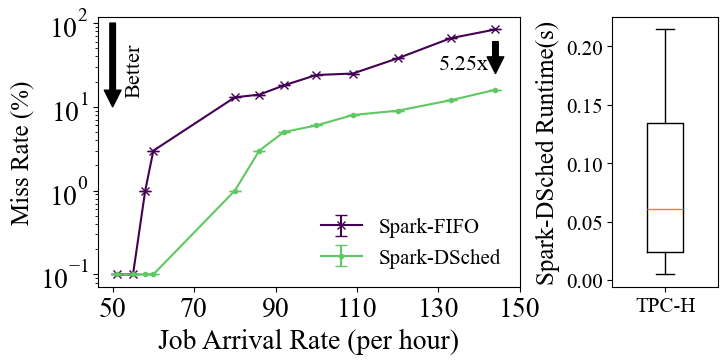

In [149]:
fig = plt.figure(figsize=(8, 3.5))


axs = fig.subplots(1, 2, gridspec_kw={'width_ratios': [8, 2]})

# arrival rate sweep
ax = axs[0]

x_vals = list(sorted(miss_rate_datapoints["Spark-DSched"].keys()))
ax.errorbar(x_vals, 
             [miss_rate_datapoints["Spark-FIFO"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["Spark-FIFO"][x].sd  for x in x_vals], 
             marker='x', label="Spark-FIFO", color=fifo, capsize=4)
ax.errorbar(x_vals, 
             [miss_rate_datapoints["Spark-DSched"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["Spark-DSched"][x].sd  for x in x_vals], 
             marker='.', label="Spark-DSched", color=dagsched, capsize=4)

ax.set_xticks(list(np.arange(50, 160, 20)))

ax.set_yscale('log')

ax.set_xlabel("Job Arrival Rate (per hour)", fontsize=20)
ax.set_ylabel("Miss Rate (%)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=20)
# plt.tight_layout()
ax.legend(loc="lower right", fontsize=15, ncol=1, columnspacing=1, frameon=False, bbox_to_anchor=(1, 0))

#Annotations 
ax.annotate('', xy=(144, (100-75)), xytext=(144, (100-40)),
             arrowprops=dict(facecolor='black', shrink=0.0001))
ax.text(130, (100-72), "5.25x", color='black', fontsize=16, rotation="horizontal")

ax.annotate('', xy=(50, (10)), xytext=(50, (100)),
             arrowprops=dict(facecolor='black', shrink=0.0001))
ax.text(53, (100-85), "Better", color='black', fontsize=16, rotation="vertical")


######################################
ax = axs[1]

# plt.figure(figsize=(3,3.5))
# plt.boxplot(
#    [v for k,v in spark_sched.items()], labels=[k for k,v in spark_sched.items()], whis=(10, 90), showfliers=False)
ax.boxplot(
    [v for k, v in spark_sched.items()], 
    labels=[k for k, v in spark_sched.items()], 
    whis=(10, 90), 
    showfliers=False,
    widths=0.35)  # Adjust the width of the box plots
# plt.xlabel("DSched's Schedulers", fontsize=20)
# ax.set_yscale("log")
ax.set_ylabel("Spark-DSched Runtime(s)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)
# fig.tight_layout()
# plt.savefig("dsched_runtime_spark_alibaba.pdf", pad_inches=0, dpi=300, bbox_inches="tight")
plt.subplots_adjust(wspace=0.35)

# fig.tight_layout()
plt.savefig("combined_spark_missRate_vs_arrivalRate_with_runtime.pdf", pad_inches=0.1, dpi=300, bbox_inches="tight")

In [7]:
utilization_at_p99 = {
    "Spark-FIFO": [32.04],
    "Spark-DSched": [80.197],
}

utilization_at_p99_datapoints = {}
for scheduler, points in utilization_at_p99.items():
    utilization_at_p99_datapoints[scheduler] = DataPoint(
        min=np.min(points),
        mean=np.mean(points),
        median=np.median(points),
        max=np.max(points),
        sd=np.std(points, ddof=1))

In [8]:
utilization_at_p99_datapoints

{'FIFO': DataPoint(min=32.04, mean=33.62, median=32.52, max=36.3, sd=2.333323809504371),
 'EDF': DataPoint(min=48.21, mean=49.49666666666667, median=48.45, max=51.83, sd=2.0242858823133965),
 'Graphene': DataPoint(min=48.66, mean=50.28666666666667, median=48.89, max=53.31, sd=2.6208077635212668),
 'TetriSched': DataPoint(min=48.07, mean=49.31666666666666, median=48.37, max=51.51, sd=1.9053958468867647),
 'DAGSched': DataPoint(min=76.58, mean=78.16566666666667, median=77.72, max=80.197, sd=1.8492258740709155)}

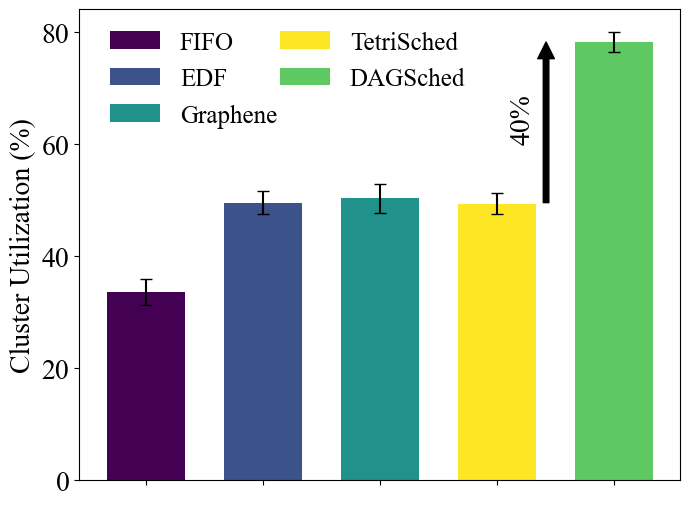

In [65]:
plt.figure(figsize=(7,5.25))
bmap_len = 7
# fifo = bmap.mpl_colors[bmap_len-0]
# edf = bmap.mpl_colors[bmap_len-2]
# graphene = bmap.mpl_colors[bmap_len-4]
# tetrisched = bmap.mpl_colors[bmap_len-5]
# dagsched = bmap.mpl_colors[bmap_len-6]

viridis = mpl.colormaps.get_cmap('viridis')
colors = viridis(np.linspace(0, 1, 5))
fifo, edf, graphene, dagsched, tetrisched = colors

# fig = plt.figure(figsize=(5, 4))
barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
plt.bar(xvals[0], [utilization_at_p99_datapoints["FIFO"].mean], yerr=utilization_at_p99_datapoints["FIFO"].sd, capsize=4, color=fifo, label="FIFO", width=0.15)
plt.bar(xvals[1], [utilization_at_p99_datapoints["EDF"].mean], yerr=utilization_at_p99_datapoints["EDF"].sd, capsize=4, color=edf, label="EDF", width=0.15)
plt.bar(xvals[2], [utilization_at_p99_datapoints["Graphene"].mean], yerr=utilization_at_p99_datapoints["Graphene"].sd, capsize=4, color=graphene, label="Graphene", width=0.15)
plt.bar(xvals[3], [utilization_at_p99_datapoints["TetriSched"].mean], yerr=utilization_at_p99_datapoints["TetriSched"].sd, capsize=4, color=tetrisched, label="TetriSched", width=0.15)
plt.bar(xvals[4], [utilization_at_p99_datapoints["DAGSched"].mean], yerr=utilization_at_p99_datapoints["DAGSched"].sd, capsize=4, color=dagsched, label="DAGSched", width=0.15)

# textcolor="black"
# plt.text(-0.03, 10, "FIFO", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.2, 10, "EDF", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.42, 10, "Graphene", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.65, 10, "TetriSched", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.88, 10, "DSched", rotation="vertical", color=textcolor, fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=20)

plt.legend(loc="lower right", fontsize=18,ncol=2, columnspacing=0.1, frameon=False, bbox_to_anchor=(0.68, 0.7))

plt.annotate('', xy=(0.77, 78.16566666666667), xytext=(0.77, 49.49666666666667),
             arrowprops=dict(facecolor='black', shrink=0.0001))
plt.text(0.70, 61, "40%", color='black', fontsize=20, rotation="vertical")
plt.tick_params(axis='both', which='major', labelsize=20)

plt.xticks(xvals, ["", "", "", "", ""])
plt.ylabel("Cluster Utilization (%)", fontsize=20)
plt.tight_layout()
plt.savefig("cluster_utilization_at_p99.pdf", dpi=300, pad_inches=0)

In [67]:

for scheduler, arrival_rates in datapoints.items():
    print(f"Scheduler: {scheduler}")
    for arrival_rate, datapoint in arrival_rates.items():
        print(f"Rate: {arrival_rate}, Data: {datapoint}")

Scheduler: Spark-FIFO
Rate: 51, Data: DataPoint(min=99.9, mean=99.9, median=99.9, max=99.9, sd=0.0)
Rate: 55, Data: DataPoint(min=99, mean=99.0, median=99.0, max=99, sd=0.0)
Rate: 60, Data: DataPoint(min=97, mean=97.0, median=97.0, max=97, sd=0.0)
Rate: 80, Data: DataPoint(min=87, mean=87.0, median=87.0, max=87, sd=0.0)
Rate: 86, Data: DataPoint(min=86, mean=86.0, median=86.0, max=86, sd=0.0)
Rate: 92, Data: DataPoint(min=82, mean=82.0, median=82.0, max=82, sd=0.0)
Rate: 100, Data: DataPoint(min=76, mean=76.0, median=76.0, max=76, sd=0.0)
Rate: 109, Data: DataPoint(min=75, mean=75.0, median=75.0, max=75, sd=0.0)
Rate: 120, Data: DataPoint(min=62, mean=62.0, median=62.0, max=62, sd=0.0)
Rate: 133, Data: DataPoint(min=34, mean=34.0, median=34.0, max=34, sd=0.0)
Rate: 144, Data: DataPoint(min=16, mean=16.0, median=16.0, max=16, sd=0.0)
Scheduler: Spark-DSched
Rate: 51, Data: DataPoint(min=99.9, mean=99.9, median=99.9, max=99.9, sd=0.0)
Rate: 55, Data: DataPoint(min=99.9, mean=99.9, median

In [68]:
arrival_rate_at_p99 = {}
SLO_ATTAINMENT = 99
for scheduler, arrival_rates in datapoints.items():
    print(f"Scheduler: {scheduler}")
    max_arrival_rate = -1
    for arrival_rate, datapoint in arrival_rates.items():
        if datapoint.sd <= 2 and (datapoint.mean - datapoint.sd) <= SLO_ATTAINMENT and SLO_ATTAINMENT <= (datapoint.mean + datapoint.sd):
            if not (scheduler == "EDF" and datapoint.sd > 1.5):
                max_arrival_rate = max(max_arrival_rate, arrival_rate)   
    if max_arrival_rate == -1:
        max_arrival_rate = 75
    arrival_rate_at_p99[scheduler] = max_arrival_rate
    
# utilization_at_p99_datapoints = {}
# for scheduler, points in utilization_at_p99.items():
#     utilization_at_p99_datapoints[scheduler] = DataPoint(
#         min=np.min(points),
#         mean=np.mean(points),
#         median=np.median(points),
#         max=np.max(points),
#         sd=np.std(points, ddof=1))
arrival_rate_at_p99

Scheduler: Spark-FIFO
Scheduler: Spark-DSched


{'Spark-FIFO': 55, 'Spark-DSched': 80}

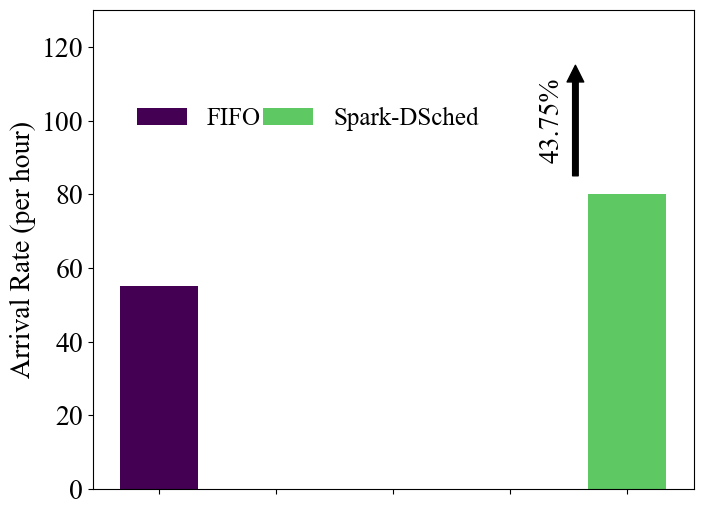

In [70]:
# plt.figure(figsize=(7,5.25))

viridis = mpl.colormaps.get_cmap('viridis')
colors = viridis(np.linspace(0, 1, 5))
fifo, edf, graphene, dagsched, tetrisched = colors

# fig = plt.figure(figsize=(5, 4))
plt.figure(figsize=(7,5.25))
barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
plt.bar(xvals[0], [arrival_rate_at_p99["Spark-FIFO"]], capsize=4, color=fifo, label="FIFO", width=0.15)
# plt.bar(xvals[1], [arrival_rate_at_p99["EDF"]], capsize=4, color=edf, label="EDF", width=0.15)
# plt.bar(xvals[2], [arrival_rate_at_p99["Graphene"]], capsize=4, color=graphene, label="Graphene", width=0.15)
# plt.bar(xvals[3], [arrival_rate_at_p99["TetriSched"]], capsize=4, color=tetrisched, label="TetriSched", width=0.15)
plt.bar(xvals[4], [arrival_rate_at_p99["Spark-DSched"]], capsize=4, color=dagsched, label="Spark-DSched", width=0.15)
plt.legend(loc="lower right", fontsize=18,ncol=2, columnspacing=0.1, frameon=False, bbox_to_anchor=(0.68, 0.7))


# plt.text(-0.03, 10, "FIFO", rotation="vertical", color='black', fontsize=20)
# plt.text(0.2, 10, "EDF", rotation="vertical", color='black', fontsize=20)
# plt.text(0.42, 10, "Graphene", rotation="vertical", color='black', fontsize=20)
# plt.text(0.65, 10, "TetriSched", rotation="vertical", color='black', fontsize=20)
# plt.text(0.86, 10, "DSched", rotation="vertical", color='black', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(xvals, ["", "", "", "", ""])
plt.ylabel("Arrival Rate (per hour)", fontsize=20)
plt.tight_layout()
plt.ylim(0,130)
plt.annotate('', xy=(0.8, 115), xytext=(0.8, 85),
             arrowprops=dict(facecolor='black', shrink=0.0001))
plt.text(0.73, 90, "43.75%", color='black', fontsize=20, rotation="vertical")
plt.savefig("arrival_rate_at_p99.pdf", dpi=300, pad_inches=0)

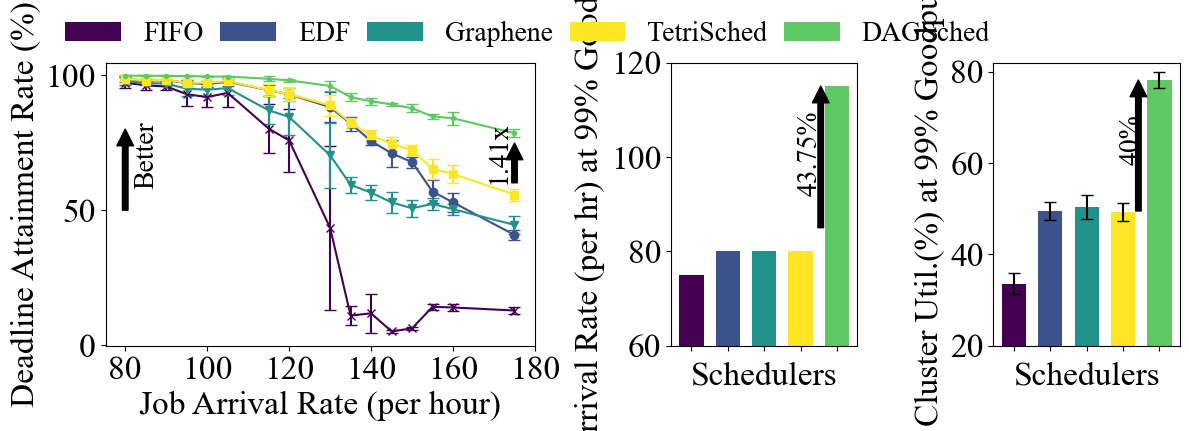

In [131]:
# fig = plt.figure(figsize=(16, 6))
fig = plt.figure(figsize=(12, 4))

axs = fig.subplots(1, 3, gridspec_kw={'width_ratios': [2.3, 1,1]})

# arrival rate sweep
ax = axs[0]

x_vals = list(sorted(datapoints["EDF"].keys()))
ax.errorbar(x_vals, 
             [datapoints["FIFO"][x].mean for x in x_vals], 
             yerr=[datapoints["FIFO"][x].sd  for x in x_vals], 
             marker='x', label="FIFO", color=fifo, capsize=4)
ax.errorbar(x_vals, 
             [datapoints["EDF"][x].mean for x in x_vals], 
             yerr=[datapoints["EDF"][x].sd  for x in x_vals], 
             marker='o', label="EDF", color=edf, capsize=4)
ax.errorbar(x_vals, 
             [datapoints["Graphene"][x].mean for x in x_vals], 
             yerr=[datapoints["Graphene"][x].sd  for x in x_vals], 
             marker='v', label="Graphene", color=graphene, capsize=4)
ax.errorbar(x_vals,
             [datapoints["TetriSched"][x].mean for x in x_vals], 
             yerr=[datapoints["TetriSched"][x].sd  for x in x_vals], 
             marker='s', label="TetriSched", color=tetrisched, capsize=4)
# plt.axvline(x=80, color=tetrisched, linestyle=':', linewidth=2)
# plt.plot([80, 80], [30, 100], color="orange", linestyle=':', linewidth=2)
ax.errorbar(x_vals, 
             [datapoints["DAGSched"][x].mean for x in x_vals], 
             yerr=[datapoints["DAGSched"][x].sd  for x in x_vals], 
             marker='.', label="DSched", color=dagsched, capsize=4)
# plt.axvline(x=115, color=dagsched, linestyle=':', linewidth=2)
# plt.plot([115, 115], [0, 100], color=dagsched, linestyle=':', linewidth=2)
ax.set_xticks(list(np.arange(80, 190, 20)))
# plt.ylim((30, 105))
# plt.annotate('', xy=(114.5, 50), xytext=(81, 50),
#              arrowprops=dict(facecolor='black', shrink=0.01))
# plt.text(89, 52, "43.75%", color='black', fontsize=20)
# plt.yticks(ticks=list(x for x in np.arange(30, 110, 10)), labels=list(f"{x}" for x in np.arange(30, 110, 10)))
ax.set_xlabel("Job Arrival Rate (per hour)", fontsize=24)
ax.set_ylabel("Deadline Attainment Rate (%)", fontsize=24)
# plt.yscale('log')
ax.tick_params(axis='both', which='major', labelsize=24)
# ax.legend(loc="lower left", fontsize=20, ncol=1, columnspacing=1, frameon=False, bbox_to_anchor=(0.02, 0))
# plt.tight24_layout()
# plt.legend()
ax.annotate('', xy=(175, 75), xytext=(175, 60),
             arrowprops=dict(facecolor='black', shrink=0.01))
ax.text(168, 62, "1.41x", color='black', fontsize=20, rotation="vertical")

ax.annotate('', xy=(80, (80)), xytext=(80, (50)),
             arrowprops=dict(facecolor='black', shrink=0.0001))
ax.text(82, 60, "Better", color='black', fontsize=20, rotation="vertical")

#################################################

ax = axs[1]

barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
ax.bar(xvals[0], [arrival_rate_at_p99["FIFO"]], capsize=4, color=fifo, label="FIFO", width=0.15)
ax.bar(xvals[1], [arrival_rate_at_p99["EDF"]], capsize=4, color=edf, label="EDF", width=0.15)
ax.bar(xvals[2], [arrival_rate_at_p99["Graphene"]], capsize=4, color=graphene, label="Graphene", width=0.15)
ax.bar(xvals[3], [arrival_rate_at_p99["TetriSched"]], capsize=4, color=tetrisched, label="TetriSched", width=0.15)
ax.bar(xvals[4], [arrival_rate_at_p99["DAGSched"]], capsize=4, color=dagsched, label="DAGSched", width=0.15)
# ax.legend(loc="lower right", fontsize=18,ncol=2, columnspacing=0.1, frameon=False, bbox_to_anchor=(0.68, 0.7))


# plt.text(-0.03, 10, "FIFO", rotation="vertical", color='black', fontsize=20)
# plt.text(0.2, 10, "EDF", rotation="vertical", color='black', fontsize=20)
# plt.text(0.42, 10, "Graphene", rotation="vertical", color='black', fontsize=20)
# plt.text(0.65, 10, "TetriSched", rotation="vertical", color='black', fontsize=20)
# plt.text(0.86, 10, "DSched", rotation="vertical", color='black', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_xticks(xvals, ["", "", "", "", ""])
# ax.set_ylabel("Arrival Rate (per hour)", fontsize=24)
ax.set_ylabel("Arrival Rate (per hr) at 99% Goodput", fontsize=24)
ax.set_xlabel("Schedulers", fontsize=24)

# ax.tight_layout()
ax.set_ylim(0,130)
ax.annotate('', xy=(0.8, 115), xytext=(0.8, 85),
             arrowprops=dict(facecolor='black', shrink=0.0001))
ax.text(0.65, 93, "43.75%", color='black', fontsize=20, rotation="vertical")

ax.set_ylim(60,120)




#################################################
ax = axs[2]
# fig = plt.figure(figsize=(5, 4))
barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
ax.bar(xvals[0], [utilization_at_p99_datapoints["FIFO"].mean], yerr=utilization_at_p99_datapoints["FIFO"].sd, capsize=4, color=fifo, label="FIFO", width=0.15)
ax.bar(xvals[1], [utilization_at_p99_datapoints["EDF"].mean], yerr=utilization_at_p99_datapoints["EDF"].sd, capsize=4, color=edf, label="EDF", width=0.15)
ax.bar(xvals[2], [utilization_at_p99_datapoints["Graphene"].mean], yerr=utilization_at_p99_datapoints["Graphene"].sd, capsize=4, color=graphene, label="Graphene", width=0.15)
ax.bar(xvals[3], [utilization_at_p99_datapoints["TetriSched"].mean], yerr=utilization_at_p99_datapoints["TetriSched"].sd, capsize=4, color=tetrisched, label="TetriSched", width=0.15)
ax.bar(xvals[4], [utilization_at_p99_datapoints["DAGSched"].mean], yerr=utilization_at_p99_datapoints["DAGSched"].sd, capsize=4, color=dagsched, label="DAGSched", width=0.15)

# textcolor="black"
# plt.text(-0.03, 10, "FIFO", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.2, 10, "EDF", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.42, 10, "Graphene", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.65, 10, "TetriSched", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.88, 10, "DSched", rotation="vertical", color=textcolor, fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=20)

# ax.legend(loc="lower right", fontsize=18,ncol=2, columnspacing=0.1, frameon=False, bbox_to_anchor=(0.68, 0.7))
ax.set_ylim(20,82)
ax.annotate('', xy=(0.77, 78.16566666666667), xytext=(0.77, 49.49666666666667),
             arrowprops=dict(facecolor='black', shrink=0.0001))
ax.text(0.65, 61, "40%", color='black', fontsize=20, rotation="vertical")
ax.tick_params(axis='both', which='major', labelsize=24)

ax.set_xticks(xvals, ["", "", "", "", ""])
# ax.set_ylabel("Cluster Utilization (%)", fontsize=24)
ax.set_ylabel("Cluster Util.(%) at 99% Goodput", fontsize=24)
ax.set_xlabel("Schedulers", fontsize=24)


lines_labels = [fig.axes[1].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize=20,ncol=5, columnspacing=0.6, frameon=False, bbox_to_anchor=(0.85, 1.1))
fig.tight_layout()
# plt.savefig("deadline_attainment_rate_combined.pdf", dpi=300, pad_inches=0)

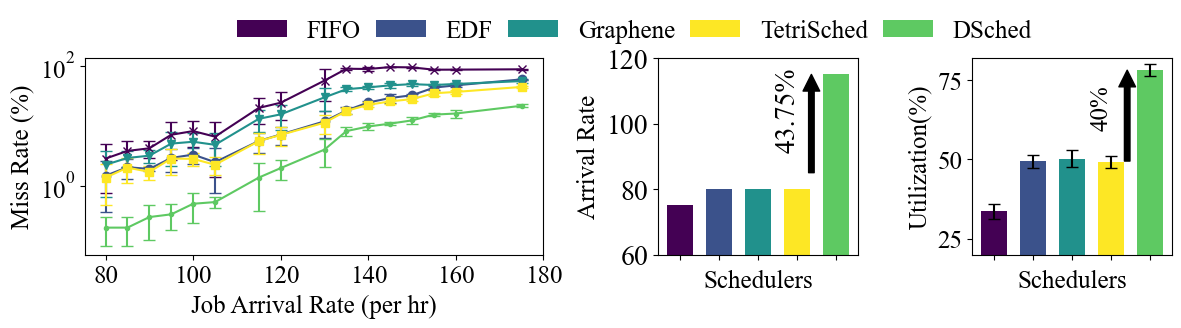

In [176]:
# fig = plt.figure(figsize=(17, 6))
# fig = plt.figure(figsize=(15.5, 5.5))
fig = plt.figure(figsize=(12, 3))


axs = fig.subplots(1, 3, gridspec_kw={'width_ratios': [2.3, 1,1]})

# arrival rate sweep
ax = axs[0]

x_vals = list(sorted(miss_rate_datapoints["EDF"].keys()))
ax.errorbar(x_vals, 
             [miss_rate_datapoints["FIFO"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["FIFO"][x].sd  for x in x_vals], 
             marker='x', label="FIFO", color=fifo, capsize=4)
ax.errorbar(x_vals, 
             [miss_rate_datapoints["EDF"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["EDF"][x].sd  for x in x_vals], 
             marker='o', label="EDF", color=edf, capsize=4)
ax.errorbar(x_vals, 
             [miss_rate_datapoints["Graphene"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["Graphene"][x].sd  for x in x_vals], 
             marker='v', label="Graphene", color=graphene, capsize=4)
ax.errorbar(x_vals,
             [miss_rate_datapoints["TetriSched"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["TetriSched"][x].sd  for x in x_vals], 
             marker='s', label="TetriSched", color=tetrisched, capsize=4)


# plt.plot([80, 80], [30, 100], color="orange", linestyle=':', linewidth=2)
ax.errorbar(x_vals, 
             [miss_rate_datapoints["DAGSched"][x].mean for x in x_vals], 
             yerr=[miss_rate_datapoints["DAGSched"][x].sd  for x in x_vals], 
             marker='.', label="DSched", color=dagsched, capsize=4)

ax.set_xticks(list(np.arange(80, 190, 20)))
# plt.xticks(list(np.arange(80, 203, 20)))

ax.set_yscale('log')

ax.set_xlabel("Job Arrival Rate (per hr)", fontsize=18)
ax.set_ylabel("Miss Rate (%)", fontsize=18)
ax.tick_params(axis="both", which='major', labelsize=18)
# ax.set_xtick_params(which='major', labelsize=20)

# plt.set_tight_layout()
# ax.legend(loc="lower right", fontsize=24, ncol=1, columnspacing=1, frameon=False, bbox_to_anchor=(1, 0))

#Annotations 
# ax.annotate('', xy=(174, (100-75)), xytext=(174, (100-60)),
#              arrowprops=dict(facecolor='black', shrink=0.0001))
# ax.text(175.5, (100-72), "2x", color='black', fontsize=20, rotation="vertical")

# ax.annotate('', xy=(80, (10)), xytext=(80, (100)),
#              arrowprops=dict(facecolor='black', shrink=0.0001))
# ax.text(82, (100-72), "Better", color='black', fontsize=20, rotation="vertical")

#################################################

ax = axs[1]

barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
ax.bar(xvals[0], [arrival_rate_at_p99["FIFO"]], capsize=4, color=fifo, label="FIFO", width=0.15)
ax.bar(xvals[1], [arrival_rate_at_p99["EDF"]], capsize=4, color=edf, label="EDF", width=0.15)
ax.bar(xvals[2], [arrival_rate_at_p99["Graphene"]], capsize=4, color=graphene, label="Graphene", width=0.15)
ax.bar(xvals[3], [arrival_rate_at_p99["TetriSched"]], capsize=4, color=tetrisched, label="TetriSched", width=0.15)
ax.bar(xvals[4], [arrival_rate_at_p99["DAGSched"]], capsize=4, color=dagsched, label="DSched", width=0.15)
# ax.legend(loc="lower right", fontsize=18,ncol=2, columnspacing=0.1, frameon=False, bbox_to_anchor=(0.68, 0.7))


# plt.text(-0.03, 10, "FIFO", rotation="vertical", color='black', fontsize=20)
# plt.text(0.2, 10, "EDF", rotation="vertical", color='black', fontsize=20)
# plt.text(0.42, 10, "Graphene", rotation="vertical", color='black', fontsize=20)
# plt.text(0.65, 10, "TetriSched", rotation="vertical", color='black', fontsize=20)
# plt.text(0.86, 10, "DSched", rotation="vertical", color='black', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks(xvals, ["", "", "", "", ""])
ax.set_ylabel("Arrival Rate", fontsize=18)
# ax.set_ylabel("Arrival Rate at 99% Goodput", fontsize=24)

ax.set_xlabel("Schedulers", fontsize=18)

# ax.tight_layout()
ax.set_ylim(0,130)
ax.annotate('', xy=(0.76, 115), xytext=(0.76, 85),
             arrowprops=dict(facecolor='black', shrink=0.0001))
ax.text(0.55, 93, "43.75%", color='black', fontsize=20, rotation="vertical")

ax.set_ylim(60,120)




#################################################
ax = axs[2]
# fig = plt.figure(figsize=(5, 4))
barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
ax.bar(xvals[0], [utilization_at_p99_datapoints["FIFO"].mean], yerr=utilization_at_p99_datapoints["FIFO"].sd, capsize=4, color=fifo, label="FIFO", width=0.15)
ax.bar(xvals[1], [utilization_at_p99_datapoints["EDF"].mean], yerr=utilization_at_p99_datapoints["EDF"].sd, capsize=4, color=edf, label="EDF", width=0.15)
ax.bar(xvals[2], [utilization_at_p99_datapoints["Graphene"].mean], yerr=utilization_at_p99_datapoints["Graphene"].sd, capsize=4, color=graphene, label="Graphene", width=0.15)
ax.bar(xvals[3], [utilization_at_p99_datapoints["TetriSched"].mean], yerr=utilization_at_p99_datapoints["TetriSched"].sd, capsize=4, color=tetrisched, label="TetriSched", width=0.15)
ax.bar(xvals[4], [utilization_at_p99_datapoints["DAGSched"].mean], yerr=utilization_at_p99_datapoints["DAGSched"].sd, capsize=4, color=dagsched, label="DSched", width=0.15)

# textcolor="black"
# plt.text(-0.03, 10, "FIFO", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.2, 10, "EDF", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.42, 10, "Graphene", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.65, 10, "TetriSched", rotation="vertical", color=textcolor, fontsize=20)
# plt.text(0.88, 10, "DSched", rotation="vertical", color=textcolor, fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=20)

# ax.legend(loc="lower right", fontsize=18,ncol=2, columnspacing=0.1, frameon=False, bbox_to_anchor=(0.68, 0.7))
ax.set_ylim(20,82)
ax.annotate('', xy=(0.77, 78.16566666666667), xytext=(0.77, 49.49666666666667),
             arrowprops=dict(facecolor='black', shrink=0.0001))
ax.text(0.55, 61, "40%", color='black', fontsize=18, rotation="vertical")
ax.tick_params(axis='both', which='major', labelsize=18)

ax.set_xticks(xvals, ["", "", "", "", ""])
# ax.set_ylabel("Cluster Util.(%) at 99% Gput", fontsize=24)
ax.set_ylabel("Utilization(%)", fontsize=18)
ax.set_xlabel("Schedulers", fontsize=18)


lines_labels = [fig.axes[1].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize=18,ncol=5, columnspacing=0.6, frameon=False, bbox_to_anchor=(0.89, 1.12))
fig.tight_layout()
plt.savefig("deadline_miss_rate_combined.pdf", dpi=300, pad_inches=0, bbox_inches="tight")